### import and reading data

In [75]:
import pandas as pd
import kagglehub
import os
import plotly.express as px
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from  sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor , plot_tree
from sklearn.ensemble import RandomForestRegressor
import joblib

In [3]:
# Download latest version
path = kagglehub.dataset_download("yasserh/advertising-sales-dataset")

100%|██████████| 2.25k/2.25k [00:00<00:00, 1.15MB/s]

Extracting files...


In [4]:
files = os.listdir(path)
files

['Advertising Budget and Sales.csv']

In [16]:
files = os.listdir(path)
csv_path = os.path.join(path,files[0])
df = pd.read_csv(csv_path)
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [17]:
df.rename(columns ={col: col.replace(' ', '') for col in df.columns}, inplace = True)

In [18]:
df.columns

Index(['Unnamed:0', 'TVAdBudget($)', 'RadioAdBudget($)',
       'NewspaperAdBudget($)', 'Sales($)'],
      dtype='object')

In [19]:
def update_regression(x_var, y_var):
    fig = px.scatter(df, x=x_var, y=y_var, trendline="ols", title=f"Linear Regression : {x_var} vs {y_var}")
    fig.show()
    #return fig

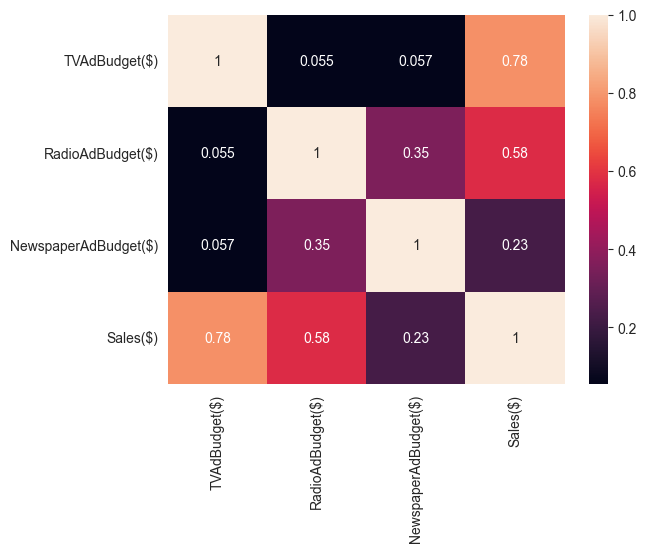

In [30]:

df = df[['TVAdBudget($)', 'RadioAdBudget($)', 'NewspaperAdBudget($)', 'Sales($)']]
sns.heatmap(df.corr(), annot=True)
plt.show()

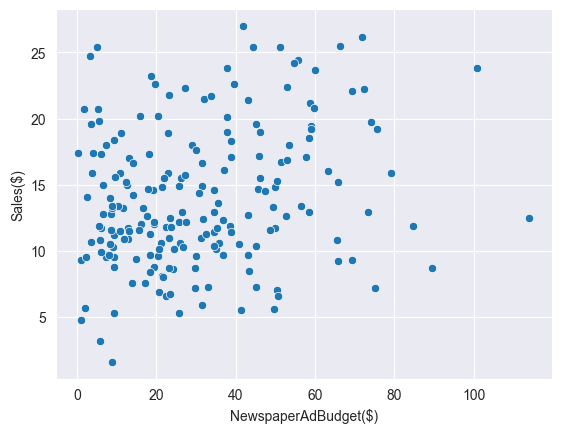

In [37]:
sns.scatterplot(df, x='NewspaperAdBudget($)' , y='Sales($)')
plt.show()

In [41]:
df.isna().sum()

TVAdBudget($)           0
RadioAdBudget($)        0
NewspaperAdBudget($)    0
Sales($)                0
dtype: int64

In [78]:
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
elastic = ElasticNet()
tree = DecisionTreeRegressor(max_leaf_nodes=3, max_depth=3)
rf = RandomForestRegressor()

In [79]:
X = df.drop('Sales($)', axis=1)
y = df['Sales($)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [80]:
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print(f"MSE Lasso: {mse}")
print(f"R2 Lasso: {R2}")

MSE Lasso: 3.6820371652186186
R2 Lasso: 0.8651496069722558


In [81]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print(f"MSE Linear Regression: {mse}")
print(f"R2 Linear Regression: {R2}")

MSE Linear Regression: 3.79679723671522
R2 Linear Regression: 0.8609466508230368


In [82]:
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print(f"MSE Ridge: {mse}")
print(f"R2 Ridge: {R2}")

MSE Ridge: 3.79669187309217
R2 Ridge: 0.8609505096450262


In [83]:
elastic.fit(X_train, y_train)
y_pred = elastic.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print(f"MSE ElasticNet: {mse}")
print(f"R2 ElasticNet: {R2}")

MSE ElasticNet: 3.73100190371244
R2 ElasticNet: 0.863356329519012


In [85]:
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print(f"MSE Tree: {mse}")
print(f"R2 Tree: {R2}")

MSE Tree: 6.303652523758291
R2 Tree: 0.7691359477930022


In [86]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print(f"MSE RandomForest: {mse}")
print(f"R2 RandomForest: {R2}")

MSE RandomForest: 0.46522139999999956
R2 RandomForest: 0.9829617991834712


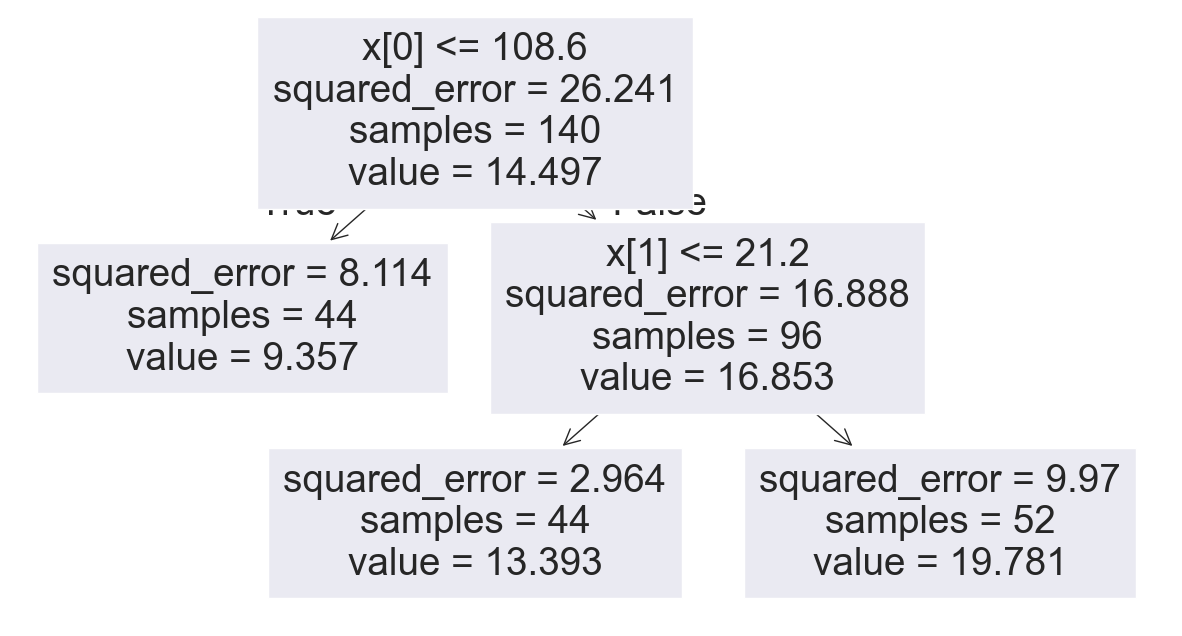

In [74]:
plt.figure(figsize=(15, 8))
plot_tree(tree)
plt.show()

In [87]:
joblib.dump(rf, "model.pkl")

['model.pkl']

In [88]:
df.columns

Index(['TVAdBudget($)', 'RadioAdBudget($)', 'NewspaperAdBudget($)',
       'Sales($)'],
      dtype='object')